## Dataset
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

## Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.

Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

The training and test data sets have 785 columns.

The first column consists of the class labels (see above), and represents the article of clothing.

The rest of 784 columns (1-785) contain the pixel-values of the associated image.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


# Read the data 

In [2]:
train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are 10 different classes of images, as following:

**0: T-shirt/top**

**1: Trouser**

**2: Pullover**

**3: Dress**

**4: Coat**

**5: Sandal**

**6: Shirt**

**7: Sneaker**

**8: Bag**

**9: Ankle boot**

Image dimmensions are **28x28**.

The train set and test set are given in two separate datasets.

The first column in the dataframe is the label.

In [4]:
label_dict = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

Show random image with its label

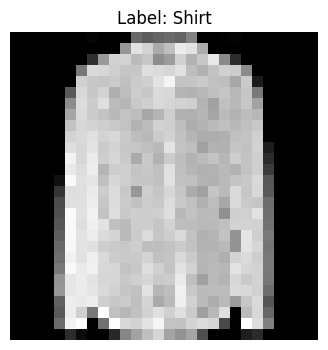

In [5]:
row_index = 2  # show the row num 2 

image_data = train.iloc[row_index, 1:].values.reshape(28, 28)  
label = train.iloc[row_index, 0]

# Display the image
plt.figure(figsize=(4,4))
plt.imshow(image_data, cmap='gray')
plt.title(f'Label: {label_dict[label]}')
plt.axis('off')
plt.show()

show multiple random images

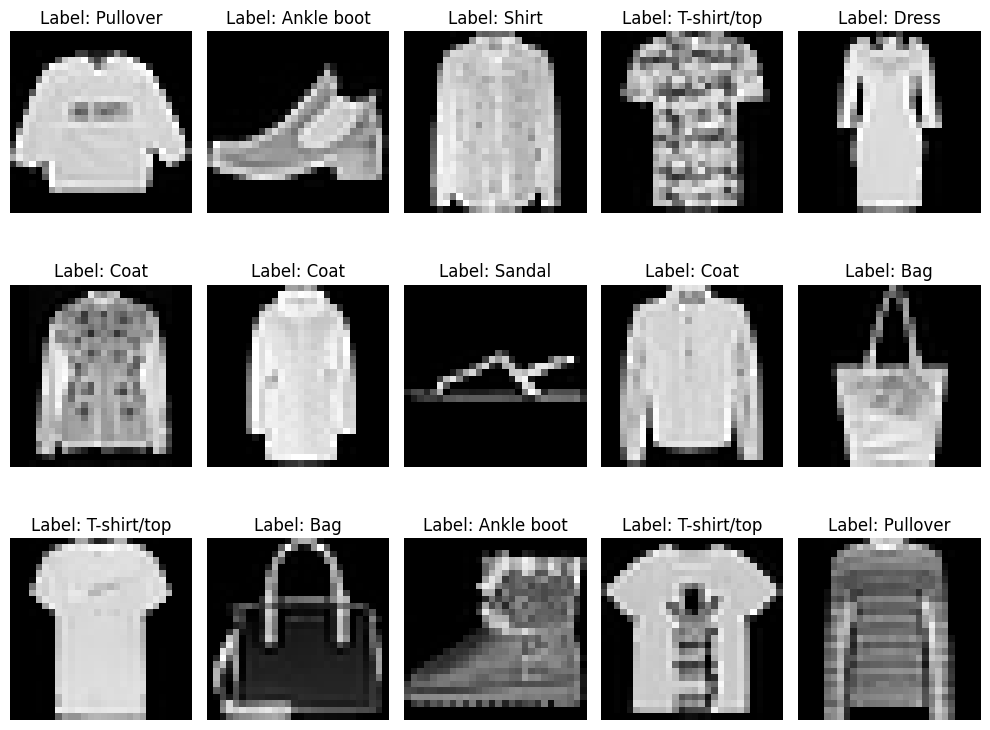

In [6]:
num_rows = 3
num_cols = 5
num_images = num_rows * num_cols

indices = range(num_images)

# Create a figure with a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 8))

for i, ax in zip(indices, axes.flatten()):
    image_data = train.iloc[i, 1:].values.reshape(28, 28) 
    label = train.iloc[i, 0] 
    
    # Display the image
    ax.imshow(image_data, cmap='gray')
    ax.set_title(f'Label: {label_dict[label]}')
    ax.axis('off') 

plt.tight_layout()
plt.show()

# Model

In [7]:
X = (train.iloc[:, 1:].values) / 255.0
y = train["label"].values

In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.8, random_state=42)

In [9]:
X_train = X_train.reshape(-1, 28, 28)
X_val = X_val.reshape(-1, 28, 28)

We will use for this model 

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  
])


model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [43]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
train_model = model.fit(X_train, y_train,
                  batch_size=128,
                  epochs=50,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5705 - loss: 1.1964 - val_accuracy: 0.7734 - val_loss: 0.5958
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7815 - loss: 0.5881 - val_accuracy: 0.8014 - val_loss: 0.5545
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8099 - loss: 0.5142 - val_accuracy: 0.8439 - val_loss: 0.4426
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8405 - loss: 0.4507 - val_accuracy: 0.8416 - val_loss: 0.4322
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8540 - loss: 0.3933 - val_accuracy: 0.8470 - val_loss: 0.4198
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8617 - loss: 0.3717 - val_accuracy: 0.8570 - val_loss: 0.4021
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8662 - loss: 0.3610 - val_accuracy: 0.8469 - val_loss: 0.4167
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8717 - loss: 0.3410 - val_accuracy: 0.8601 - v

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor='val_loss', mode='min')


In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Softmax activation for multi-class classification
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_model = model.fit(X_train, y_train,
                        batch_size=128,
                        epochs=50,
                        verbose=1,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping, model_checkpoint, reduce_lr])


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.2749 - loss: 2.5910 - val_accuracy: 0.6906 - val_loss: 1.3688 - learning_rate: 0.0010
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5957 - loss: 1.5404 - val_accuracy: 0.7542 - val_loss: 1.0896 - learning_rate: 0.0010
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6830 - loss: 1.2439 - val_accuracy: 0.7638 - val_loss: 0.9572 - learning_rate: 0.0010
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7165 - loss: 1.1193 - val_accuracy: 0.7903 - val_loss: 0.8754 - learning_rate: 0.0010
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7581 - loss: 0.9867 - val_accuracy: 0.8051 - val_loss: 0.8267 - learning_rate: 0.0010


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor='val_loss', mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

train_model = model.fit(X_train, y_train,
                        batch_size=128,
                        epochs=50,
                        verbose=1,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 126ms/step - accuracy: 0.2612 - loss: 2.2616 - val_accuracy: 0.7051 - val_loss: 1.0678 - learning_rate: 0.0010
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.6179 - loss: 1.2462 - val_accuracy: 0.7642 - val_loss: 0.8027 - learning_rate: 0.0010
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.6925 - loss: 1.0076 - val_accuracy: 0.7655 - val_loss: 0.7461 - learning_rate: 0.0010
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.7432 - loss: 0.8730 - val_accuracy: 0.7898 - val_loss: 0.6881 - learning_rate: 0.0010
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.7483 - loss: 0.8350 - val_accuracy: 0.8011 - val_loss: 0.6557 - learning_rate: 0.0010
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.7600 - loss: 0.7921 - val_accuracy: 0.8053 - val_loss: 0.6303 - learning_rate: 0.0010
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.7769 - loss: 0.

In [22]:
X_test = (test.iloc[:, 1:].values) / 255.0 
y_test = test["label"].values 

In [27]:
X_test = X_test.reshape(-1, 28, 28)

In [28]:
X_test.shape

(10000, 28, 28)

In [29]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8951 - loss: 0.3867
Test Accuracy: 0.8973
Test Loss: 0.3802


In [30]:
model.save("fashion_mnist_model.keras")

In [31]:
from tensorflow.keras.models import load_model

loaded_model = load_model("fashion_mnist_model.keras")

# Evaluate the loaded model on the test set to confirm it was saved and loaded correctly
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test, verbose=1)
print(f"Loaded Model Test Accuracy: {test_accuracy:.4f}")
print(f"Loaded Model Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8951 - loss: 0.3867
Loaded Model Test Accuracy: 0.8973
Loaded Model Test Loss: 0.3802
